In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path

In [2]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp')
files = Path(data_dir).glob("./**/*.smr")
smr_names = [str(f) for f in files]
dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 1][-8:]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231005]
df

,SMR_file,date,slip,cell,trial_string
38,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1
39,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1
40,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,2,1,468_patch_clamp_20231024_slip2_cell1
41,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,3,1,468_patch_clamp_20231024_slip3_cell1
42,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,4,1,468_patch_clamp_20231024_slip4_cell1
43,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,1,1,468_patch_clamp_20231025_slip1_cell1
44,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,1,468_patch_clamp_20231025_slip2_cell1
45,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,2,468_patch_clamp_20231025_slip2_cell2
46,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,3,1,468_patch_clamp_20231025_slip3_cell1
47,R:\home\firefly_link\468_patch_clamp\20231031\...,20231031,1,1,468_patch_clamp_20231031_slip1_cell1


In [3]:
reader = neo.io.Spike2IO(filename=df.SMR_file[45],try_signal_grouping=False)
# read the block
bl = reader.read(lazy=False)[0]
#bl

In [24]:
index = 45
save_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')
data_dir = Path(save_dir,'_'.join(df.trial_string[index].split('_')[-3:]) )
data_dir

WindowsPath('R:/home/firefly_link/468_patch_clamp/results_profiles/20231025_slip2_cell2')

In [4]:
asig_t = bl.segments[0].analogsignals[0]
# Extract sample times
#times = asig_t.times.rescale('s').magnitude
# Determine channel name, without leading b' 
asig = asig_t
ch = asig.name
V_cc = {}
I_cc = {}
# Extract sampling frequency
fs = float(asig.sampling_rate)
# Assign sampling times, sampling frequency and data to correct dictionary
for asig in bl.segments[0].analogsignals:
    ch = asig.name
    times = asig.times.rescale('s').magnitude
    if ch == 'V_vc':
        
        V_cc['times'] = times
        V_cc['signal'] = np.array(asig)
        #V_cc['fs'] = fs
    elif ch == 'I_vc':
        
        I_cc['times'] = times
        I_cc['signal'] = np.array(asig)
        #I_cc['fs'] = fs

In [5]:
V = np.squeeze(V_cc['signal'])
I = np.squeeze(I_cc['signal'])

In [25]:
#Vs_save = np.vstack(Vs)
#Is_save = np.vstack(Is)
np.save(Path(data_dir,'Vs_ramp.npy'),Vs)
np.save(Path(data_dir,'Is_ramp.npy'),Is)

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


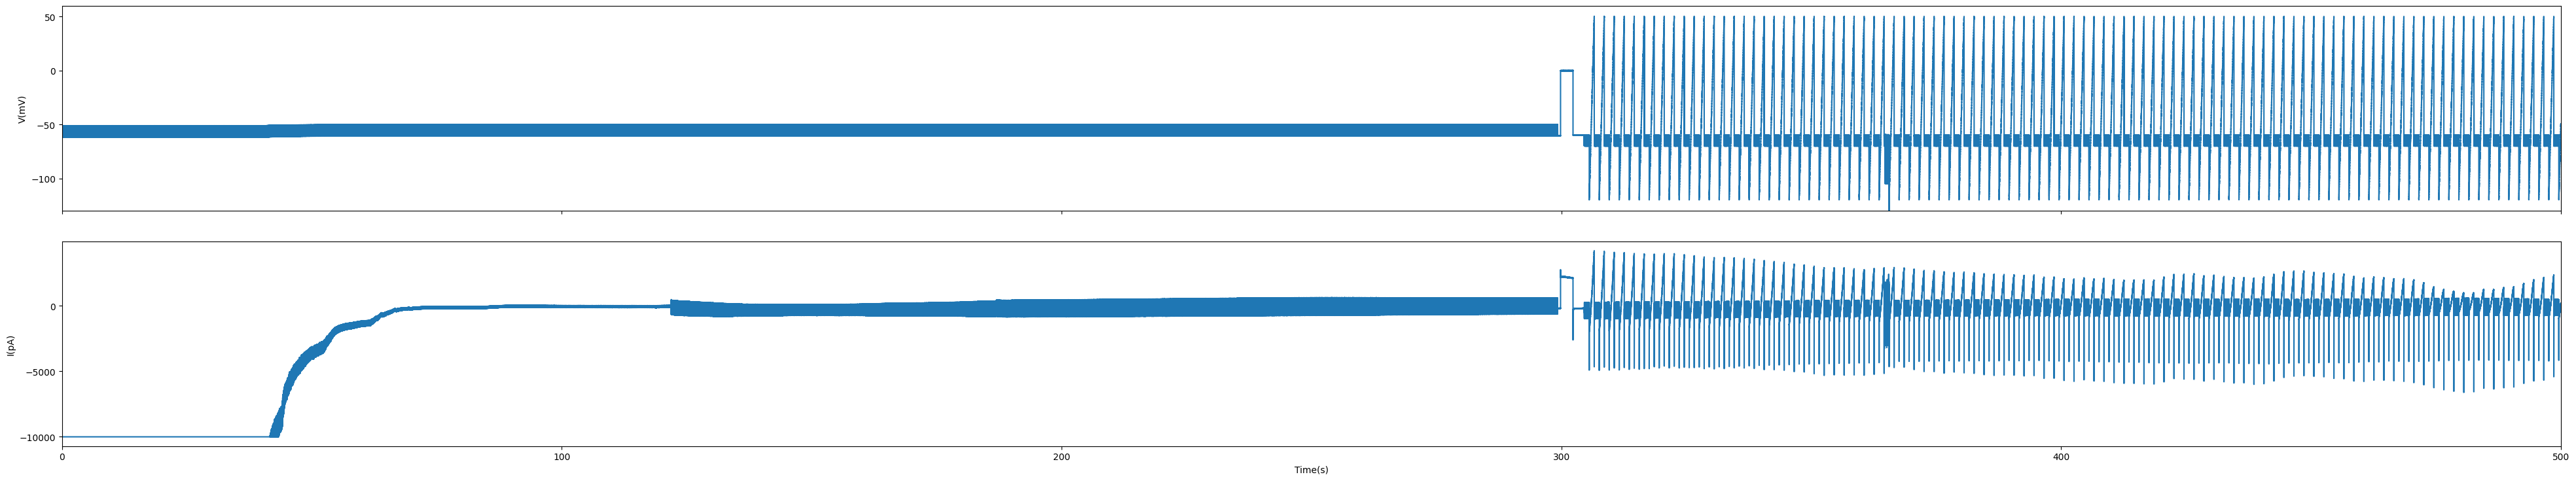

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,8))
t = 500
axs[0].plot(times[np.where(times<t)], V_cc['signal'][np.where(times<t)])
axs[0].set_ylim(-130,60)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(0,t)
axs[1].plot(times[np.where(times<t)], I_cc['signal'][np.where(times<t)])
axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time(s)')
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

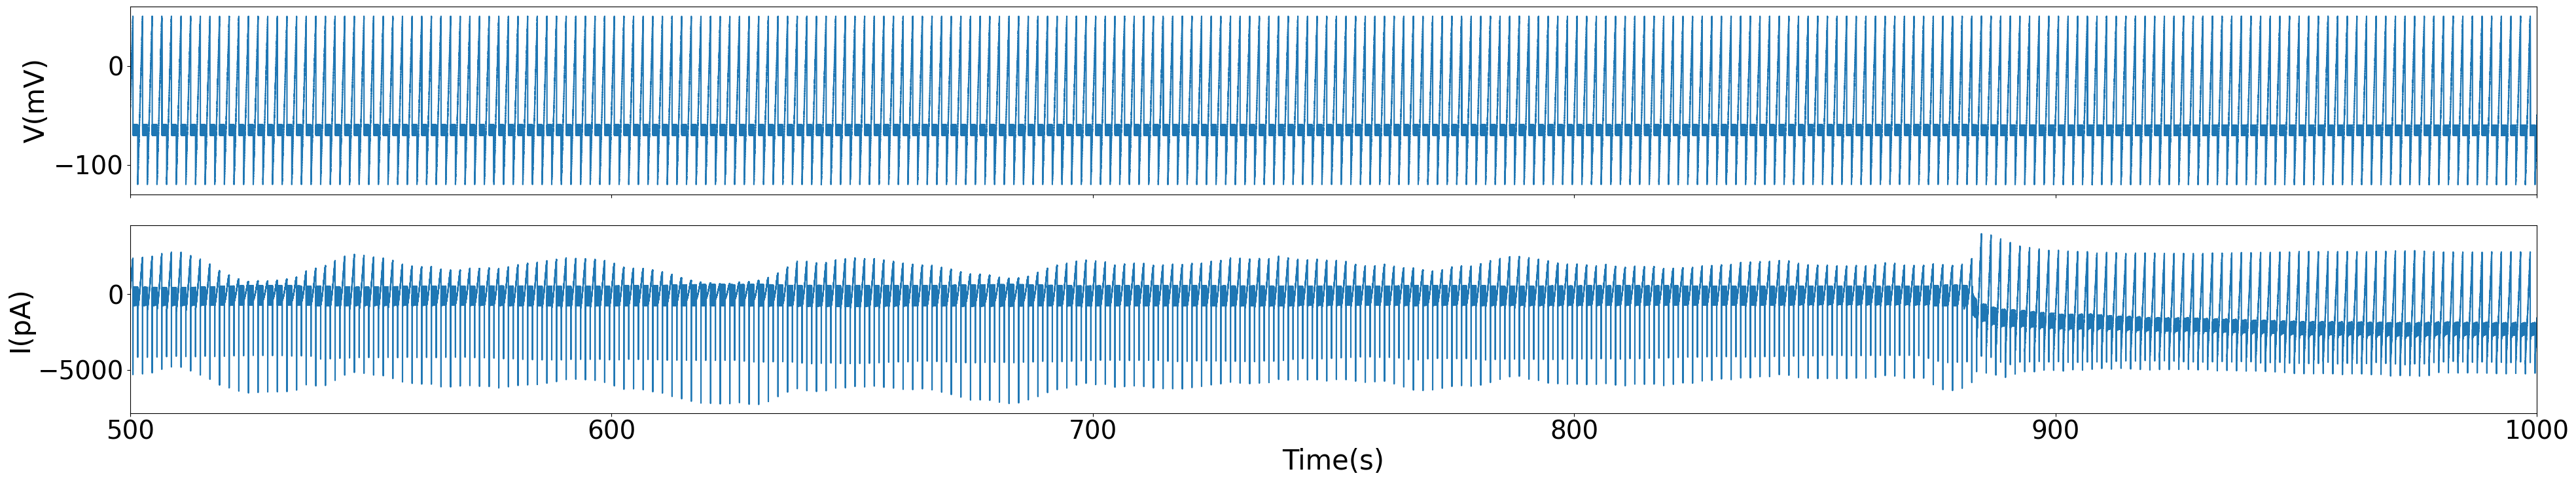

In [7]:
#%matplotlib auto
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,8))
t_min = 500
t_max = 1000

axs[0].plot(times[(times>=t_min)&(times<t_max)], V_cc['signal'][(times>=t_min)&(times<t_max)])
axs[0].set_ylim(-130,60)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(t_min,t_max)
axs[1].plot(times[(times>=t_min)&(times<t_max)], I_cc['signal'][(times>=t_min)&(times<t_max)])

axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time(s)')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

In [6]:
t_initial = times[(V<-120)&(times>367.01)][0]

t_last = 880
t_initials = np.arange(t_initial,t_last,2)

Vs = []
Is = []
for t in t_initials:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    Vs.append(V[(times>=t)&(times<t+0.999)])
    Is.append(I[(times>=t)&(times<t+0.999)])

In [26]:
g = []
for i in range(len(Is)): 
    g.append((Is[i][-1]-Is[i][0])/(Vs[i][-1]-Vs[i][0]))
np.save(Path(data_dir,'Conductance.npy'),g)

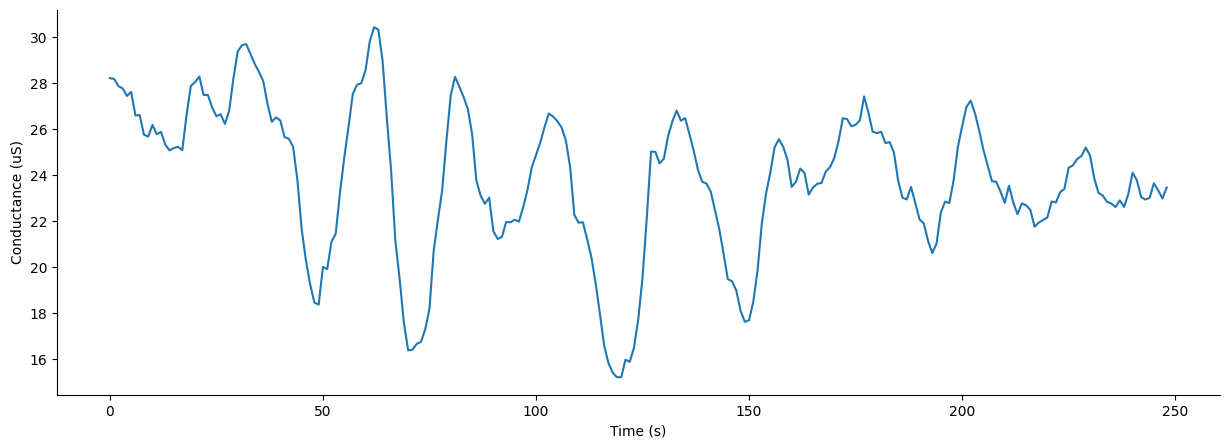

In [8]:
r_accept= g
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(g)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Conductance (uS)')
plt.show()

<IPython.core.display.Javascript object>


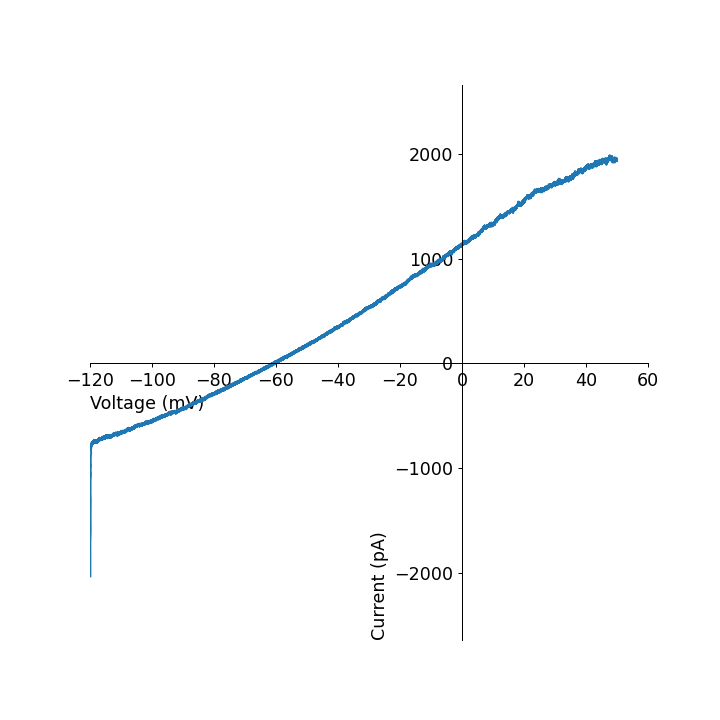

In [14]:
%matplotlib notebook 
from IPython import display
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize = (8,8))
line, = ax.plot(Vs[0],Is[0])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Voltage (mV)',loc = 'left')
plt.ylabel('Current (pA)',loc = 'bottom')
#plt.ylim([-3000,4000])
plt.xlim([-120,60])
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

def init():
    line.set_ydata([np.nan] * len(Is))

def animate(i):
    #ax.clear()
    line.set_xdata(Vs[i])
    line.set_ydata(Is[i])  # update the data
    #ax.plot(Vs[i],Is[i])
    
ani = FuncAnimation(fig, animate,
                    #init_func=init,
                    interval=50, repeat = False, 
                    frames = len(Is), save_count = len(Is)
                   )
ani.save(r'C:\Users\Firefly\Desktop\patch clamp results\20231025_slip2_cell2_all.mp4')

plt.show()

In [13]:
len(Is)

249

249


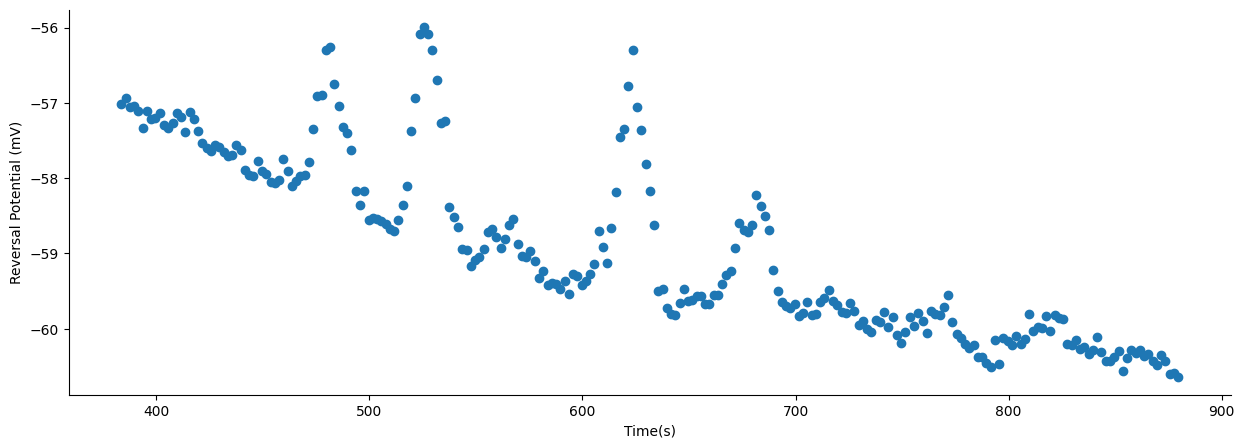

In [11]:
from sklearn import  linear_model
#using linear regression for each ramp to find the y-intercept
V_rev = []
a = 5 #this is the linear fitting threshold
for i in range(len(Vs)):
    x = Is[i][np.where((Is[i] >= -a) & (Is[i] <=a))].reshape(1, -1)
    y = Vs[i][np.where((Is[i] >= -a) & (Is[i] <=a))].reshape(1, -1)
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    V_rev.append(reg.intercept_.mean())
    
t = np.arange(0,len(V_rev)*2,2)
print(len(V_rev))
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_initials,V_rev)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Reversal Potential (mV)')
plt.show()

In [27]:
np.save(Path(data_dir,'V_rev.npy'),V_rev)

In [14]:
from scipy import optimize
import math
def model_func(t, A, K, C):
    return A * np.exp(K * t) + C
def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = optimize.curve_fit(model_func, t, y, p0=[1,-0.5, 1],maxfev = 2000)
    A, K, C = opt_parms
    return A, K, C
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

In [15]:
t_seal = []
#879
for t in np.arange(366.9,369,2):
    t_min = t
    t_max = t+0.1
    t_range = times[(times>=t_min)&(times<t_max)]
    I_range = I[(times>=t_min)&(times<t_max)]
    t_max = t_range[I_range.argmax()]
    t_seal.append(t_max)
    #print(I_range.max())

<IPython.core.display.Javascript object>


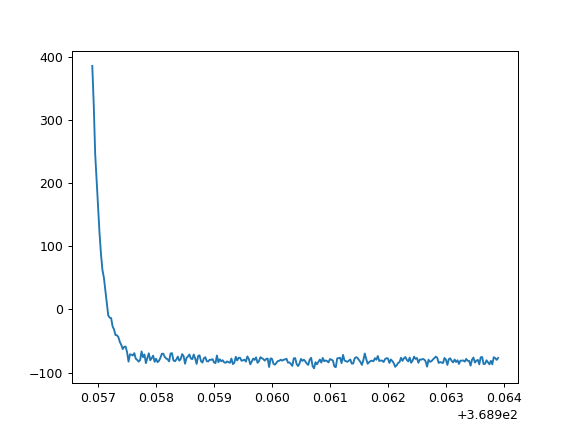

In [16]:
%matplotlib notebook 
#t_upper_initial = t_max
#t_lower_initial = t_upper_initial + 0.01
#t_seal = np.arange(t_upper_initial,280,2)
t = times[(times>=t_max)&(times<t_max+0.007)]
ttest = t - t[0]
I_exp = I[(times>=t_max)&(times<t_max+0.007)]
plt.plot(t,I_exp)
plt.show()

<IPython.core.display.Javascript object>


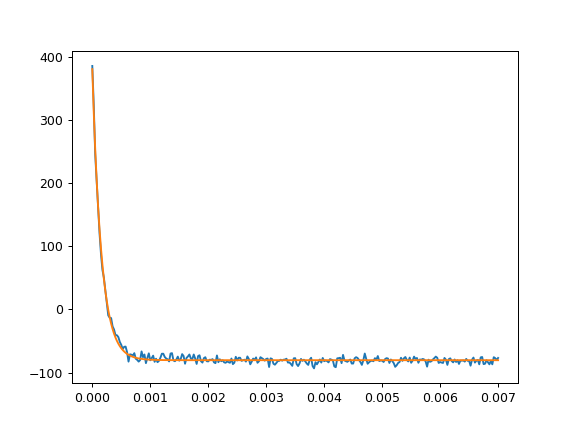

In [17]:
%matplotlib notebook
# Non-linear Fit
A, K, C = fit_exp_nonlinear(ttest, I_exp)
fit_y = model_func(ttest, A, K, C)

plt.plot(ttest, I_exp)
plt.plot(ttest, fit_y)
plt.show()

<IPython.core.display.Javascript object>


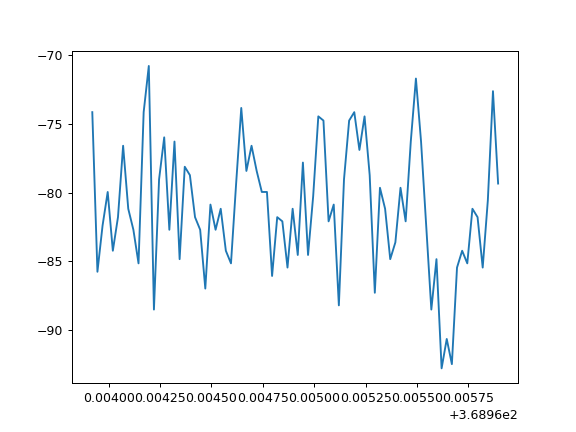

In [18]:
%matplotlib notebook 
#t_upper_initial = t_max
#t_lower_initial = t_upper_initial + 0.01
#t_seal = np.arange(t_upper_initial,280,2)
t = times[(times>=t_max+0.007)&(times<t_max+0.009)]
ttest = t - t[0]
I_exp = I[(times>=t_max+0.007)&(times<t_max+0.009)]
plt.plot(t,I_exp)
plt.show()

In [19]:
#compute access resistance over time
#calculate acceptance resistance during breaking in
t_seal = []
#879
for t in np.arange(366.9,879,2):
    t_min = t
    t_max = t+0.1
    t_range = times[(times>=t_min)&(times<t_max)]
    I_range = I[(times>=t_min)&(times<t_max)]
    t_max = t_range[I_range.argmax()]
    t_seal.append(t_max)
    #print(I_range.max())
from sklearn.metrics import r2_score
Vs_seal_upper = []
Is_seal_upper = []

Vs_seal_lower = []
Is_seal_lower = []

I_exp = []

#I_ss = []
Ra = []
Cm = []
R = []
r2 = []
#t_seal_trial = t_seal[:5]
for t in t_seal:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    
    V_u = V[(times>=t)&(times<t+0.007)].mean()
    I_u = I[(times>=t)&(times<t+0.007)].mean()

    
    Vs_seal_upper.append(V_u)
    Is_seal_upper.append(I_u)
    
    V_l = V[(times>=t+0.017)&(times<t+0.019)].mean()
    I_l = I[(times>=t+0.017)&(times<t+0.019)].mean()
    
    Vs_seal_lower.append(V_l)
    Is_seal_lower.append(I_l)
    
    #I_ss.append((I_u + I_l)/2)
    
    I_exp = I[(times>=t)&(times<t+0.007)]

    t_u = times[(times>=t)&(times<t+0.007)]
    ttest = t_u - t_u[0]
    
    if (V_u - V_l >15):
        print('Warning', t)
    
    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(ttest, I_exp)
    fit_y = model_func(ttest, A, K, C)
    r2.append(r2_score(I_exp, fit_y))
    if any(m<0 for m in fit_y):
        integrate_part = fit_y + np.abs(fit_y.min())
        #if any(n < 0 for n in integrate_part):
            #print('Warning - still have netative values here')
    else:
        integrate_part = fit_y - fit_y.min()
    integrate_part = fit_y + np.abs(fit_y.min())
    #if any(n < 0 for n in integrate_part):
        #print('Warning - still have netative values here')
    q1 = integrate(ttest, integrate_part)
    q1 = q1*1e-12
    tau = 1/-K #tau is in seconds
    q2 = (I_u - I_l)*1e-12 * tau #tau is in 1/seconds, deltaI is in amps
    cm = (q1+q2)/(V_u - V_l)
    cm = cm/1e-3 #cm is now in farad
    Cm.append(cm*1e12)#now cm is in pF
    Rt = (V_u - V_l)*1e-3*1e12/(I_u - I_l)# now Rt is in ohms
    R.append(Rt*1e-6)
    #Ra2 - Ra * Rt + Rt * (Tau/Cm) = 0
    a = 1
    b = -Rt 
    c = Rt*(tau/(cm)) 

    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis))
    Ra1 = (-b+sqrt_val)/2*a
    Ra2 = (-b-sqrt_val)/2*a
    Ra.append(Ra1/1e6)

<IPython.core.display.Javascript object>


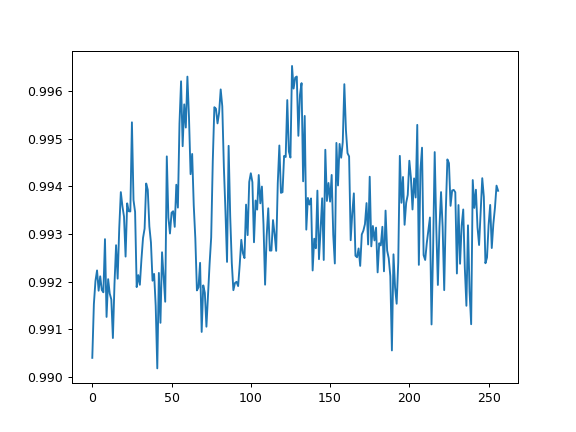

In [20]:
%matplotlib notebook 
plt.plot(r2)

<IPython.core.display.Javascript object>


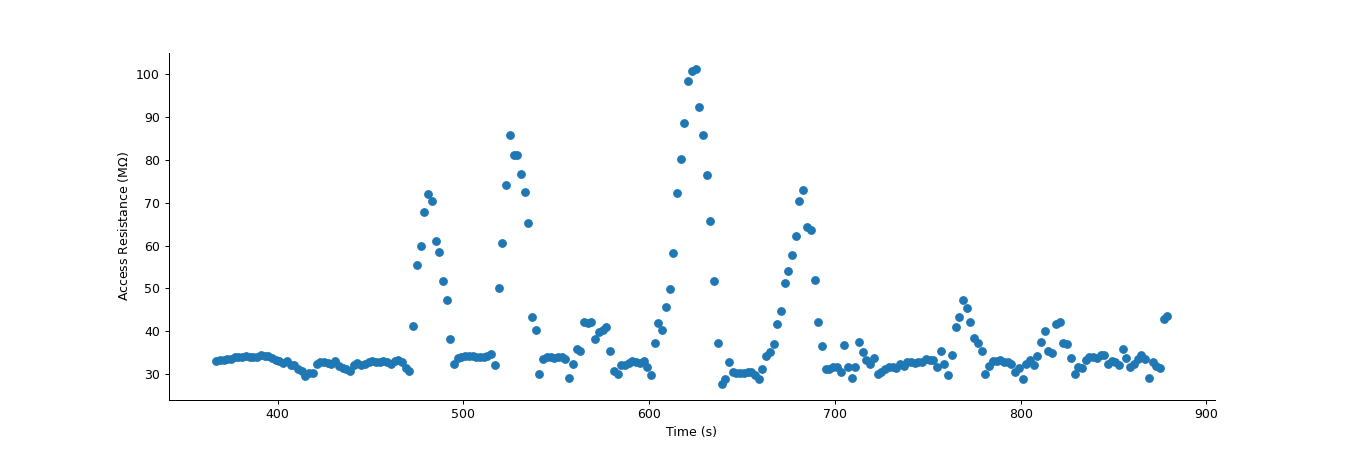

In [21]:
r_accept = Ra
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Access Resistance (M$\Omega$)')
plt.show()

<IPython.core.display.Javascript object>


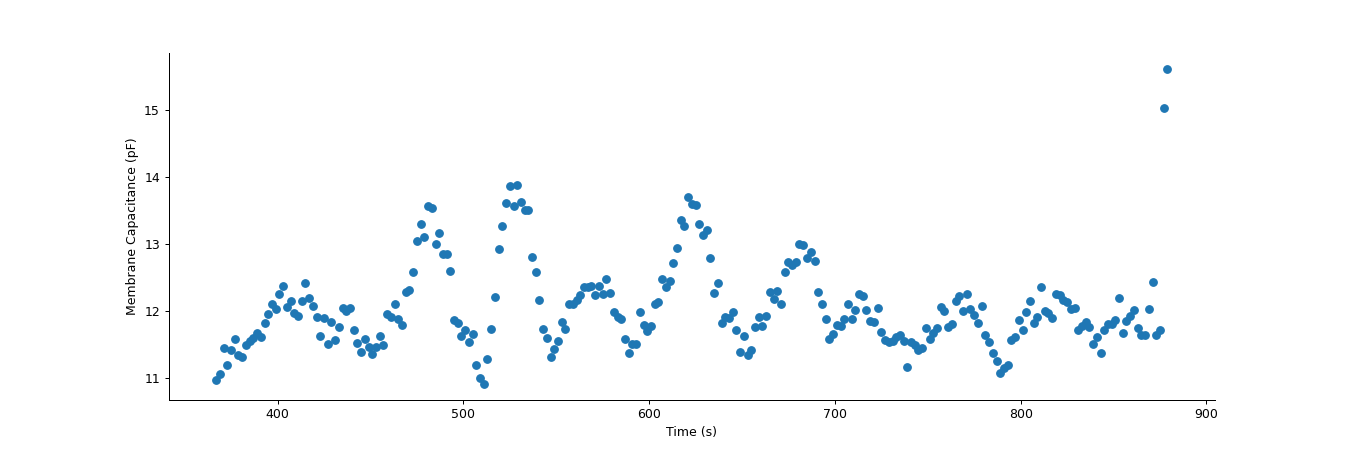

In [22]:
r_accept= Cm
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Capacitance (pF)')
plt.show()

In [28]:
np.save(Path(data_dir,'Ra.npy'),Ra)
np.save(Path(data_dir,'Cm.npy'),Cm)
np.save(Path(data_dir,'t_for_ramp_V_rev_Ra_Cm.npy'),t_initials)

In [ ]:
%matplotlib notebook 
#t_upper_initial = 920.2156

#t_seal = np.arange(t_upper_initial,922,2)
index = 100
t = times[(times>=t_seal[index])&(times<t_seal[index]+0.007)]
ttest = t - t[0]
I_exp = I[(times>=t_seal[index])&(times<t_seal[index]+0.007)]
#plt.plot(t,I_exp)
#plt.show()


A, K, C = fit_exp_nonlinear(ttest, I_exp)
fit_y = model_func(ttest, A, K, C)

plt.plot(ttest, I_exp)
plt.plot(ttest, fit_y)
plt.show()